<a href="https://colab.research.google.com/github/rachelgloriosa/Text_Analysis_UNGA-/blob/main/Text_Analysis_UN_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Is Indonesia aligned with the UN Agenda? A comparative text analysis between President of Indonesia and UN Secretary General Antonio Guterres***

# **Introduction**

In contemporary global politics, speeches delivered at the United Nations General Assembly (UNGA) serve not only as instruments of diplomacy but also as a reflection of how states position themselves within the multilateral system. Language, as a vehicle of political intent, often reveals the degree to which national leaders align—or deliberately diverge—from the global agenda articulated by the United Nations. This study explores such alignment by analyzing and comparing the UNGA address of Indonesian President Prabowo Subianto with the speech of UN Secretary-General António Guterres. The comparison seeks to examine whether Prabowo’s rhetoric resonates with, complements, or contrasts the priorities championed by the UN, particularly regarding global cooperation, sustainable development, and peacebuilding.

The analysis is motivated by the idea that political language is not merely descriptive but strategic. For new leaders like Prabowo, his first speech at the UNGA represents an important opportunity to project Indonesia’s global vision and to define his leadership style within an international forum (Cabinet Secretary of the Republic of Indonesia, 2025). His speech as the high level forum not only signifies Indonesia's diplomatic stance, but also reflect the leader's image building in international stage. Guterres, meanwhile, embodies the normative voice of multilateralism—emphasizing climate action, inequality reduction, and human solidarity. Assessing the thematic and linguistic alignment between these two speeches provides insights into how Indonesia’s foreign policy discourse situates itself in relation to the multilateral order.

This paper examines the personal branding of Indonesian President Prabowo Subianto through his speech delivered at the United Nations General Assembly (UNGA). As Indonesia’s new head of state, Prabowo’s international debut marks a defining moment in how he articulates Indonesia’s stance in multilateral forums. However, it is possible that leaders' branding could differ between domestic and international stage - depending on the branding objectives of the leader itself. Image building in itself may align to the overall agendas of a multilateral forum, but leaders could also utilize high-level forum such as the UNGA to shape public opinions domestically. Hence, this analysis is aimed to analyze whether Prabowo's branding implementation at the UNGA synchronizes with Secretary General Guterres's agenda.

# **Methodologies**

To investigate the rhetorical patterns and linguistic choices that underpin Prabowo’s self-presentation as a global leader, this study applies Natural Language Toolkit (NLTK) for text analysis. NLTK enables computational exploration of language patterns by tokenizing text, identifying word frequencies, and analyzing sentiment and thematic clusters. This library is the most suitable considering that our data entry will involve, not just text, but also context - further emphasizing the need to analyze when and where certain agendas or stance are positioned in speeches or in campaign materials.

The text analysis process began with setting up the necessary libraries, specifically NLTK, and downloading the speech data from GitHub. The raw text was then processed by tokenizing and normalizing the words, removing common English stopwords, and lemmatizing the remaining tokens to their base form. This cleaned text was used to generate frequency distributions of words for each speech and visualize the top terms. Finally, lexical diversity was calculated, keyword dispersion plots were generated to show term positioning, and sentiment analysis was performed using VADER to assess the overall emotional tone of each speech. These steps allowed for a comparative analysis of the two speeches based on word usage, structure, and sentiment.

# **Results**

##### Setting up the NLTK library and upload the data point



In [52]:
!pip -q install -U nltk

import nltk
import matplotlib
%matplotlib inline
needed = ["punkt_tab",
          "stopwords",
          "wordnet",
          "averaged_perceptron_tagger_eng",
          "inaugural"]
for pkg in needed:
    nltk.download(pkg, quiet=True)

print("NLTK version:", nltk.__version__)

NLTK version: 3.9.2


In [53]:
import os
import requests

# Define the raw URLs of the text files on GitHub
# Make sure to use the "Raw" link for the file on GitHub
github_url_prabowo = 'https://raw.githubusercontent.com/rachelgloriosa/Text_Analysis_UNGA-/main/prabowo_unga.txt'
github_url_guterres = 'https://raw.githubusercontent.com/rachelgloriosa/Text_Analysis_UNGA-/main/guterres_unga.txt'

# Define the destination directory in your Colab environment
colab_destination_dir = '/content/my_corpus'

# Create the destination directory if it doesn't exist
if not os.path.exists(colab_destination_dir):
    os.makedirs(colab_destination_dir)

# Function to download file from URL
def download_file(url, destination_folder):
    local_filename = os.path.join(destination_folder, url.split('/')[-1])
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    return local_filename

# Download the files from GitHub to the Colab environment
try:
    prabowo_file_path = download_file(github_url_prabowo, colab_destination_dir)
    guterres_file_path = download_file(github_url_guterres, colab_destination_dir)
    print(f"Files downloaded to: {colab_destination_dir}")

    from nltk.corpus import PlaintextCorpusReader

    corpus_root = 'my_corpus'  # folder path
    # Corrected regex for .txt files
    my_corpus = PlaintextCorpusReader(corpus_root, r'.*\.txt')

    print(my_corpus.fileids())  # list of your text files
    text_prabowo = my_corpus.raw('prabowo_unga.txt')  # read a specific file
    print("\nPreview of prabowo_unga.txt:")
    print(text_prabowo[:500])  # preview

    text_guterres = my_corpus.raw('guterres_unga.txt') # read a specific file
    print("\nPreview of guterres_unga.txt:")
    print(text_guterres[:500]) # preview

except requests.exceptions.RequestException as e:
    print(f"Error downloading files: {e}")
    print("Please ensure the GitHub URLs are correct and the files are accessible.")

Files downloaded to: /content/my_corpus
['guterres_unga.txt', 'prabowo_unga.txt']

Preview of prabowo_unga.txt:
President Prabowo Subianto:
Indonesia's Call for Hope
Remarks Delivered at the United Nations General Assembly September 23 2025


Bismillahirrahmanirrahim,
Assalamu'alaikum warahmatullahi wabarakatuh. Shalom, Salve, Om swastiastu,
Salam kebajikan, Rahayu, rahayu.


Madam President, distinguished delegates, excellencies,


It is indeed a great honor to stand in this august General Assembly Hall, among leaders who represent almost all of humanity.


We differ in race, religion, and nationality, y

Preview of guterres_unga.txt:
Let me begin with two words we have not been able to say often enough in this Hall:

Madame President, Excellencies,
Ladies and gentlemen,

Eighty years ago, in a world scorched by war, leaders made a choice. Cooperation over chaos.
Law over lawlessness. Peace over conflict.
That choice gave birth to the United Nations – not as a dream for perfection, bu

#### Lowercase and keep only alphabetic tokens (drop punctuation/numbers) for a quick clean view.

In [54]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, FreqDist
from nltk.tokenize import RegexpTokenizer

def wordnet_pos(tag):
    return {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}.get(tag[0], wordnet.NOUN)

# 1) Tokenize & normalize (safer)
def tokenize_norm(text):
    tok = RegexpTokenizer(r"[A-Za-z0-9]+")  # keeps alphanumeric runs, drops punctuation
    return [t.lower() for t in tok.tokenize(text)]

# 2) Remove stopwords
def remove_stopwords(toks):
    stops = set(stopwords.words("english"))
    return [t for t in toks if t not in stops]

# 3–4) POS-tag once, then lemmatize
def pos_lemmatize(toks):
    tags = pos_tag(toks)
    lem = WordNetLemmatizer()
    return [lem.lemmatize(t, wordnet_pos(tag)) for t, tag in tags]

def run_pipeline(text):
    toks = tokenize_norm(text)
    toks_nostop = remove_stopwords(toks)
    clean = pos_lemmatize(toks_nostop)
    return toks, toks_nostop, clean

# --- Sanity test on Prabowo's speech ---
from nltk.corpus import PlaintextCorpusReader
s1 = 'prabowo_unga.txt'
raw = my_corpus.raw(s1)

toks, toks_nostop, clean = run_pipeline(raw)
print("Prabowo's Speech:", s1)
print("Counts -> toks:", len(toks), "| no-stop:", len(toks_nostop), "| clean:", len(clean))
print("Top 10 (clean):", FreqDist(clean).most_common(10))


Prabowo's Speech: prabowo_unga.txt
Counts -> toks: 1411 | no-stop: 812 | clean: 812
Top 10 (clean): [('world', 12), ('indonesia', 11), ('must', 11), ('un', 10), ('u', 9), ('civilisation', 9), ('great', 7), ('live', 7), ('peace', 7), ('violence', 7)]


In [55]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, FreqDist
from nltk.tokenize import RegexpTokenizer

def wordnet_pos(tag):
    return {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}.get(tag[0], wordnet.NOUN)

# 1) Tokenize & normalize (safer)
def tokenize_norm(text):
    tok = RegexpTokenizer(r"[A-Za-z0-9]+")  # keeps alphanumeric runs, drops punctuation
    return [t.lower() for t in tok.tokenize(text)]

# 2) Remove stopwords
def remove_stopwords(toks):
    stops = set(stopwords.words("english"))
    return [t for t in toks if t not in stops]

# 3–4) POS-tag once, then lemmatize
def pos_lemmatize(toks):
    tags = pos_tag(toks)
    lem = WordNetLemmatizer()
    return [lem.lemmatize(t, wordnet_pos(tag)) for t, tag in tags]

def run_pipeline(text):
    toks = tokenize_norm(text)
    toks_nostop = remove_stopwords(toks)
    clean = pos_lemmatize(toks_nostop)
    return toks, toks_nostop, clean

# --- Sanity test on Guterres's speech ---
s2 = 'guterres_unga.txt'
raw2 = my_corpus.raw(s2)

toks2, toks_nostop2, clean2 = run_pipeline(raw2)
print("\nGuterres's Speech:", s2)
print("Counts -> toks:", len(toks2), "| no-stop:", len(toks_nostop2), "| clean:", len(clean2))
# Corrected to show top 10 for Guterres's speech (clean2)
print("Top 10 (clean):", FreqDist(clean2).most_common(10))


Guterres's Speech: guterres_unga.txt
Counts -> toks: 2757 | no-stop: 1558 | clean: 1558
Top 10 (clean): [('must', 34), ('world', 22), ('right', 21), ('choose', 19), ('human', 18), ('u', 14), ('peace', 13), ('nation', 13), ('international', 13), ('choice', 12)]


# Comparing the Two Speeches: Top terms and lexical diversity

This section aims to compare the two speeches and analyze top terms and keyword dispersions implemented by the two leaders. The aim is to observe how the leaders emphasize several agendas and analyze the prioritization mechanism of these agendas. Furthermore, this section also scrutinize on the lexical diversity of each corresponding leader.

#### Top Terms Analysis and Lexical Diversity

In [56]:
# You can change these IDs. Use 'fileids' printed earlier to choose.
s1, s2 = 'prabowo_unga.txt', 'guterres_unga.txt'
raw1, raw2 =  my_corpus.raw(s1), my_corpus.raw(s2)

# Clean tokens for both speeches using the defined run_pipeline function.
# Assuming run_pipeline is defined in a previous cell that has been executed.
toks1, toks_nostop1, c1 = run_pipeline(raw1)
toks2, toks_nostop2, c2 = run_pipeline(raw2)


# Frequency distributions (counts of words)
fd1, fd2 = FreqDist(c1), FreqDist(c2)
top1 = fd1.most_common(25)
top2 = fd2.most_common(25)

print(f"\nTop terms — {s1}")
for word, count in top1[:10]:
    print(f"{word:>10}   {count}")

print(f"\nTop terms — {s2}")
for word, count in top2[:10]:
    print(f"{word:>10}   {count}")

# Define lexical_diversity function
def lexical_diversity(text, sample_size):
    """
    Calculate lexical diversity (type-token ratio) for a sample of text.
    """
    if len(text) < sample_size:
        sample_size = len(text)
    if sample_size == 0:
        return 0
    sample = text[:sample_size]
    return len(set(sample)) / sample_size

print("\nLexical diversity (slice 2000):")
print(f"{s1:>15}   {lexical_diversity(c1, 10000):.4f}")
print(f"{s2:>15}   {lexical_diversity(c2, 10000):.4f}")


Top terms — prabowo_unga.txt
     world   12
 indonesia   11
      must   11
        un   10
         u   9
civilisation   9
     great   7
      live   7
     peace   7
  violence   7

Top terms — guterres_unga.txt
      must   34
     world   22
     right   21
    choose   19
     human   18
         u   14
     peace   13
    nation   13
international   13
    choice   12

Lexical diversity (slice 2000):
prabowo_unga.txt   0.6071
guterres_unga.txt   0.5276


#### Top Terms Visualization

In [57]:
import plotly.express as px
import pandas as pd

def plot_top_plotly(fd, title, k=15):
    # Get top-k words and counts
    data = fd.most_common(k)
    df = pd.DataFrame(data, columns=["word", "count"])

    # Interactive bar chart
    fig = px.bar(
        df,
        x="word",
        y="count",
        title=title,
        labels={"word": "Word", "count": "Frequency"},
    )

    # Rotate x labels for readability
    fig.update_layout(xaxis_tickangle=-45)
    fig.show()

# Use for both speeches
plot_top_plotly(fd1, f"Top terms — {s1}")
plot_top_plotly(fd2, f"Top terms — {s2}")

#### Based on the results from the analysis:

*   **Top Terms:**
    *   **Prabowo's speech:** The most frequent terms include "world," "indonesia," "must," "un," and "civilisation." This suggests a focus on Indonesia's place in the global context and the role of the UN, with a strong emphasis on necessity or obligation ("must").
    *   **Guterres's speech:** The top terms are "must," "world," "right," "choose," and "human." This highlights a focus on global issues, human rights, and the importance of making choices, again with a strong emphasis on necessity ("must"). The higher frequency of "must" in Guterres's speech compared to Prabowo's might indicate a stronger call to action or a more urgent tone regarding global challenges.

*   **Lexical Diversity:**
    *   Prabowo's speech has a slightly higher lexical diversity (0.6071) compared to Guterres's speech (0.5276). This could suggest that Prabowo used a slightly wider range of unique words relative to the total number of words in his speech, or it could be influenced by the length of the speeches.

# Compare keyword positions (dispersion) across both speeches

This section observes how certain issues are strategized within a speech by using a dispersion plot. Intuitively, leaders tend to put engaging words (could be in the form of critical issues) in the beginning of a speech to engage their audiences. The issues are then built up towards the complication and then concluded by a call to action or resolution.

The terms are chosen based on SDG progress that is aimed to be achieved by 2030. World Economic Forum (2025) identified SDGs 1 (no poverty), 5 (gender equality), and 10 (reduced inequalities) are some of the stagnating SDGs to be achieved by 2030. In contrast, SDG 7 (affordable and clean energy), 9 (industry, innovation, and infrastructure), 4 (quality education), and 3 (good health and well-being) are on track in mostly high-income regions.

Identifying these lingering issues enables us to somewhat measure leaders' perception towards currently urgent global issue and analyze their solution to these.

prabowo_unga.txt
guterres_unga.txt


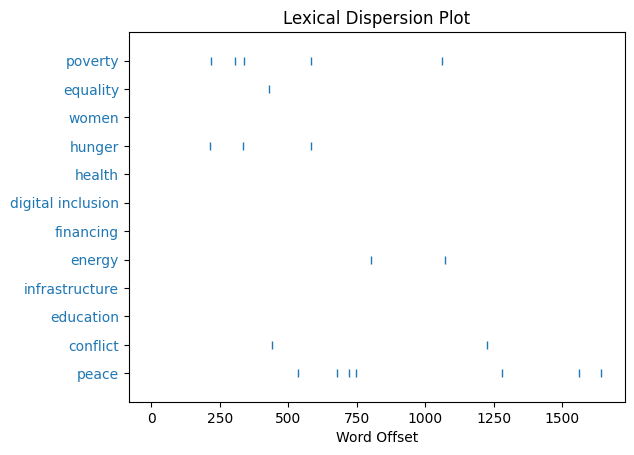

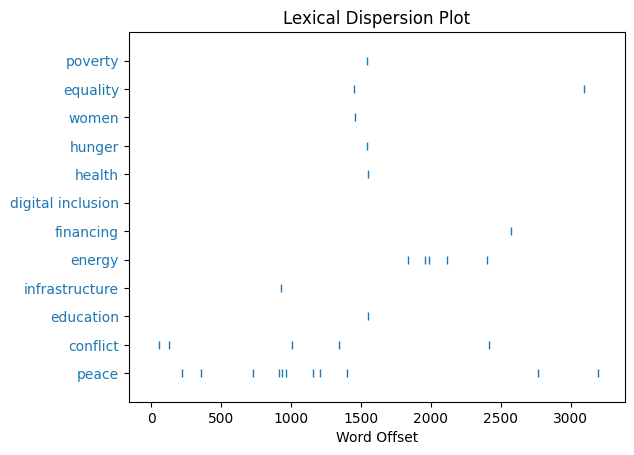

In [58]:
terms = ["poverty", "equality", "women", "hunger", "health", "digital inclusion", "financing", "energy", "infrastructure", "education", "conflict", "peace"]
from nltk.text import Text
T1 = Text(nltk.word_tokenize(raw1))
T2 = Text(nltk.word_tokenize(raw2))
print(s1)
T1.dispersion_plot(terms)
print(s2)
T2.dispersion_plot(terms)

#### Based on the analysis:

President Prabowo and Secretary General Guteres has different approaches in strategizing their speech. President Prabowo has the tendency to open his speech with pressing issues indicated by keywords like "poverty" and "hunger", while Secretary General Guteres opened his speech by leveraging the keyword "conflict" and immediately call for "peace".

In terms of policy, Prabowo also seems to draw emphasis on issues such as hunger and energy accessibility based on the dispersion plot. Unlike Secretary General Guterres, President Prabowo did not mention policy issues demonstrated by the lack of keyword mention of "women", "health", "financing", "infrastructure", and "education".

Another interesting takeaway, Secretary General Guterres mentioned keywords from both of the most stagnated and progressing SDG-s, except for digital inclusion.

#### Collocations (Common policy phrase)

This section allows us to dissect some of the common collocations used in both policies brought upon by President Prabowo and Secretary General Guterres during their speech.

In [59]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

def top_bigrams(tokens, min_freq=3, k=15):
    finder = BigramCollocationFinder.from_words(tokens)
    finder.apply_freq_filter(min_freq)  # ignore very rare pairs
    return finder.nbest(BigramAssocMeasures().pmi, k)

top_bigrams(c1, min_freq=2, k=15)

[('alaikum', 'warahmatullahi'),
 ('energy', 'water'),
 ('net', 'zero'),
 ('reject', 'doctrine'),
 ('shalom', 'salve'),
 ('wabarakatuh', 'shalom'),
 ('warahmatullahi', 'wabarakatuh'),
 ('achieve', 'net'),
 ('climate', 'change'),
 ('salve', 'om'),
 ('weak', 'suffer'),
 ('palestine', 'israel'),
 ('use', 'science'),
 ('shanti', 'shanti'),
 ('council', 'assembly')]

#### Based on the analysis:

Meanwhile, top bigrams (common two-word phrases) in both of the leaders' speeches like "energy water," "net zero," "climate change," and "palestine israel" indicate specifically critical policy areas or international issues. Phrases like "reject doctrine" or "weak suffer" might reflect rhetorical framing or specific points being made - encompassing the urgency of addressing these issues in a global scale.

#### VADER sentiment for short political text

Lastly, the objective of the sentiment analysis is to project a leaders' sentiment towards an issue. This information enables analysts to hypothesize the underlying communication objective of the speech and understand reasoning to leverage certain issues in certain sentiments.

In [60]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Get the raw text of the speeches
raw_prabowo = my_corpus.raw('prabowo_unga.txt')
raw_guterres = my_corpus.raw('guterres_unga.txt')

# Get sentiment scores for Prabowo's speech
sentiment_prabowo = sia.polarity_scores(raw_prabowo)
print("Sentiment scores for Prabowo's speech:")
print(sentiment_prabowo)

# Get sentiment scores for Guterres's speech
sentiment_guterres = sia.polarity_scores(raw_guterres)
print("\nSentiment scores for Guterres's speech:")
print(sentiment_guterres)

Sentiment scores for Prabowo's speech:
{'neg': 0.13, 'neu': 0.681, 'pos': 0.188, 'compound': 0.9982}

Sentiment scores for Guterres's speech:
{'neg': 0.146, 'neu': 0.68, 'pos': 0.174, 'compound': 0.9979}


#### Based on the analysis:

Both speeches have high compound sentiment scores (Prabowo: 0.9982, Guterres: 0.9979), indicating an overall positive sentiment.
Comparing the pos, neg, and neu scores can provide more nuance, Prabowo's speech has a slightly higher positive score (0.188) and a slightly lower negative score (0.13) than Guterres's speech (pos: 0.174, neg: 0.146). The neutral scores are very similar. This suggests that while both speeches are generally positive, Prabowo's might be slightly more positively framed, or Guterres's might acknowledge challenges (negative aspects) slightly more.

# Discussion and Conclusion

The comparative text analysis of President Prabowo Subianto’s and Secretary-General António Guterres’s 2025 UNGA speeches provides insight into how both leaders framed their global narratives, revealing overlapping priorities but distinct rhetorical strategies.

The top-term frequency highlights strong thematic convergence around globalism, obligation, and collective responsibility. Both leaders repeatedly used “world” and “must,” underscoring a shared sense of urgency toward international cooperation. Yet the nuanced differences are telling: Prabowo’s frequent use of “Indonesia” and “civilisation” suggests a focus on national identity and moral contribution within a global order—projecting Indonesia as both participant and exemplar of global responsibility. Guterres’s emphasis on “right,” “choose,” and “human,” by contrast, aligns with his institutional role as the moral voice of multilateralism, prioritizing human rights and ethical decision-making. Furthermore, Prabowo’s speech has slightly higher lexical diversity, indicating his effort to weave diverse topics—ranging from energy transition to geopolitical conflicts—into a single narrative of Indonesia’s global relevance. Guterres’s - even though as the overarching leader of the UN and needs to address multidimensional issues for over 10 minutes - relatively lower diversity likely reflects his structured, issue-driven address that reiterates long-standing UN themes.

The keyword dispersion patterns complement this observation: while both addressed peace, equality, and conflict, the temporal distribution of these words within the speeches shows differences in narrative design. Guterres tends to integrate these values consistently throughout, reflecting institutional continuity, whereas Prabowo’s mentions cluster around specific sections, possibly to dramatize Indonesia’s positioning on key issues such as Palestine or climate justice.

Prabowo’s collocations—including “net zero,” “energy water,” and “Palestine Israel”—signal his rhetorical attempt to embed Indonesia in discussions of sustainability and global equity. Phrases such as “reject doctrine” or “weak suffer” evoke moral assertiveness and post-colonial critique, framing Indonesia as a defender of fairness in global governance.

Finally, the sentiment analysis reinforces that both leaders maintain optimistic tones, though Prabowo’s slightly higher positivity score suggests a more aspirational and promotional stance, fitting for a newly inaugurated leader seeking legitimacy and alignment with global ideals.

Overall, the findings show that Prabowo’s discourse aligns substantially with Guterres’s multilateral agenda—particularly on peace, climate, and justice—while simultaneously crafting a distinct narrative of national pride and moral agency. His rhetoric bridges global cooperation and Indonesian exceptionalism, positioning him as both a partner of and a contributor to the UN’s collective vision.

# References

Presidential Secretariat of the Republic of Indonesia. (2025, September 24). President Prabowo’s first address at 80th UNGA earns international praise. https://setkab.go.id/en/president-prabowos-first-address-at-80th-unga-earns-international-praise/

World Economic Forum. (2025, September ??). Five years to go: Are we on track to meet the Sustainable Development Goals? https://www.weforum.org/stories/2025/09/sdg-progress-report-2025/